[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pconstantinides/tuc-ieeesb-qtech/blob/main/basic_intro/simulating_quantum_computers.ipynb)


In [1]:
# Uncomment the following to install required libraries
!pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00


# Generate a three-qubit GHZ state using Qiskit patterns <a id="ghz"></a>

Now, we will follow this episode of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) to guide you through the process of generating a three-qubit GHZ state using [Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns).

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure.

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results


## Step 1. Map <a id="map"></a>

The Greenberger–Horne–Zeilinger (GHZ) state is the extension to three (or more) qubits to the maximally entangled state characteristic of the Bell state depicted above. That means that the GHZ state is:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

One of the interesting features of the GHZ state is that there are different and equivalent ways to build it using a quantum circuit. In Exercise 1 you will do it in one of the most common ways.

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_histogram


<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 1: Design a GHZ state</b>

In this exercise, you will design a GHZ state following the steps below:

1. Apply a Hadamard gate to qubit 0, putting it into a superposition.
2. Apply a CNOT gate between qubits 0 and 1.
3. Apply a CNOT gate between qubits 1 and 2.

</div>

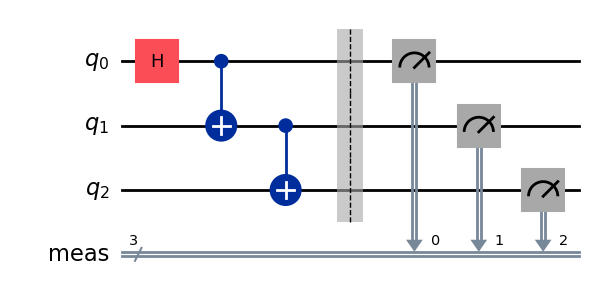

In [3]:
def ghz_circuit():
  qc = QuantumCircuit(3)

  #####################
  # Add your code here
  #####################

  #delete this
  qc.h(0)
  qc.cx(0, 1)
  qc.cx(1, 2)
  #
  return qc

ghz = ghz_circuit()
ghz.measure_active()
ghz.draw("mpl")

In [4]:
def run_circuit(circuit, shots=1000, noise_model=None):
  """
  Executes a quantum circuit many times.

  Parameters:
    circuit (QuantumCircuit): the quantum circuit to simulate.
    shots (int): the number of times to run the circuit.
    noise_model (NoiseModel): An optional noise model to simulate.

  Returns:
    counts (dict): A the number of times each outcome was measured.
  """
  sim = AerSimulator(noise_model=noise_model)

  circuit = transpile(circuit, sim)

  result = sim.run(circuit, shots=shots).result()
  counts = result.get_counts()
  return counts

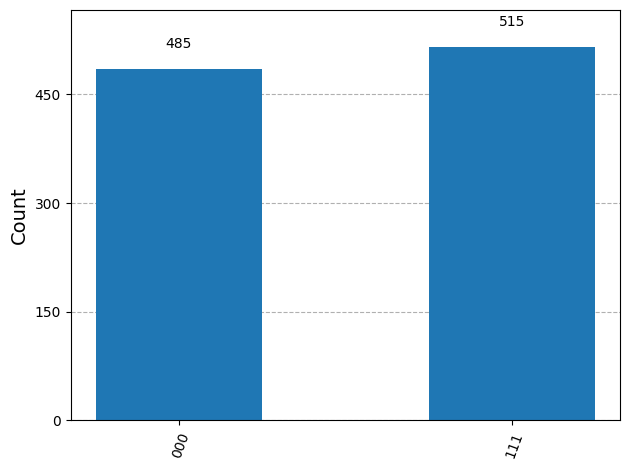

In [8]:
##############################################
#  counts = # Execute the GHZ circuit many times
##############################################

# delete this
counts = run_circuit(ghz)
#

plot_histogram(counts)

In [9]:
ghz.remove_final_measurements()
ghz.save_statevector() # requires qiskit-aer

sim = AerSimulator(method="statevector")

result = sim.run(ghz).result()

In [10]:
statevector = result.get_statevector()

array_to_latex(statevector)

<IPython.core.display.Latex object>

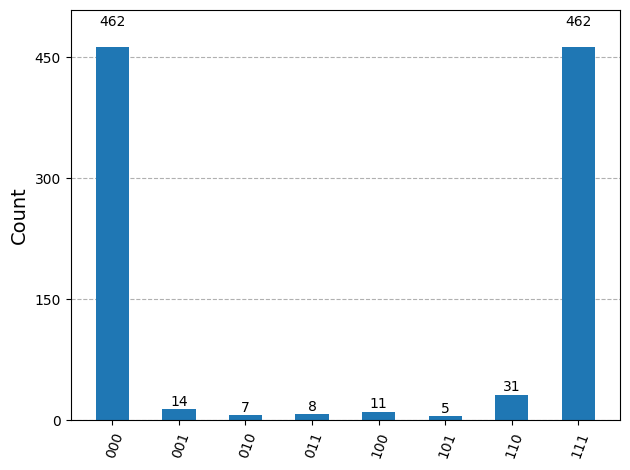

In [13]:
from qiskit import transpile
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error


##############################################################
# ghz = # Create a new GHZ circuit and measure all the qubits
##############################################################

# delete this
ghz = ghz_circuit()
ghz.measure_active()
#


# Define the probabilities for each type of error
p_gate1 = 0.03
p_gate2 = 0.05
p_meas = 0.04

# QuantumError objects
error_meas = pauli_error([("X", p_meas/2), ("Z", p_meas/2), ("I", 1 - p_meas)])
error_gate1 = pauli_error([("X", p_gate1/2), ("Z", p_gate1/2), ("I", 1 - p_gate1)])
error_gate2 = pauli_error([("XX", p_gate2/2), ("ZZ", p_gate2/2), ("II", 1 - p_gate2)])

# Add errors to noise model
n_model = NoiseModel()
n_model.add_all_qubit_quantum_error(error_meas, "measure")
n_model.add_all_qubit_quantum_error(error_gate1, ["H"])
n_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

# Run and get counts
noisy_counts = run_circuit(ghz, noise_model=n_model)

# Plot noisy output
plot_histogram(noisy_counts)